<h1> Spotify Data Analysis & Visualisation</h1>

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [297]:
dataset_path = 'dataset.csv'
data = pd.read_csv(dataset_path)
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


<h1>Understanding The Data</h1>
<ul>

<li>popularity: (0-100) based on most recent, most played tracks</li>
<li>explicit: (T/F) contains explicit lyrics</li>
<li>danceability: (0.0-1.0) based on tempo, rhythm stability, beat strength</li>
<li>energy: (0.0-1.0) based on fast,loud,and noise</li>
<li>key: 0=C, 1=C#/Db, 2=D</li>
<li>mode: major = 1, minor = 0</li>
<li>speechiness: (0.0-1.0), < 0.33 non-speech like</li>
<li>acousticness: (0.0-1.0)</li>
<li>instructmentalness: (0.0-1.0) 1.0= instrucmental, "Ooh" and "ahh" are treated as instrumental</li>
<li>liveness: Listen for audience, >0.8 is likely live</li>
<li>valence: (0.0-1.0) high=happy, cheerful, euphoric. low = sad, depressed, angry</li>
<li>tempo: BPM</li>

</ul>

<h3>Cleaning Of Data</h3>

<b>Checking for Null/Empty Values within Data</b>

In [298]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [299]:
data[data["artists"].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [300]:
data.drop([65900], inplace=True)
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [301]:
data["artists"].value_counts()


artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: count, Length: 31437, dtype: int64

In [302]:
data["track_genre"].value_counts()


track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: count, Length: 114, dtype: int64

<h1> Most Popular Song Genre</h1>
<ul>
<li>I want to check what genre is the most popular in the library, so I grouped the tracks by track_genre and sort them by the popularity score

In [303]:
popularity_score = data.groupby('track_genre')['popularity'].mean().sort_values(ascending = False).head(12)
popularity_score

track_genre
pop-film             59.283000
k-pop                56.952953
chill                53.651000
sad                  52.379000
grunge               49.594000
indian               49.539000
anime                48.772000
emo                  48.128000
sertanejo            47.866000
pop                  47.576000
progressive-house    46.615000
piano                45.273000
Name: popularity, dtype: float64

The top 12 most popular genre above came out unexpected. My suspicion was that some tracks in some genre have outliers being the very popular, thus, increasing the popularity score of the genre by a significant amount. Therefore, I excluded tracks that are above 99th percentile, which turns out to be a popularity score of 80 or below, and there are 954 tracks with a popularity score above 80

In [304]:
np.quantile(data['popularity'], 0.99)

80.0

In [305]:
(data['popularity'] > 80).value_counts()

popularity
False    113045
True        954
Name: count, dtype: int64

In [306]:
data_removing_outlier = data[(data['popularity'] < 80)]
data_removing_outlier

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [333]:
data_score_no_outlier = data_removing_outlier.groupby('track_genre')['popularity'].mean().sort_values(ascending = False).head(12)

Text(0, 0.5, 'Popularity (0-100)')

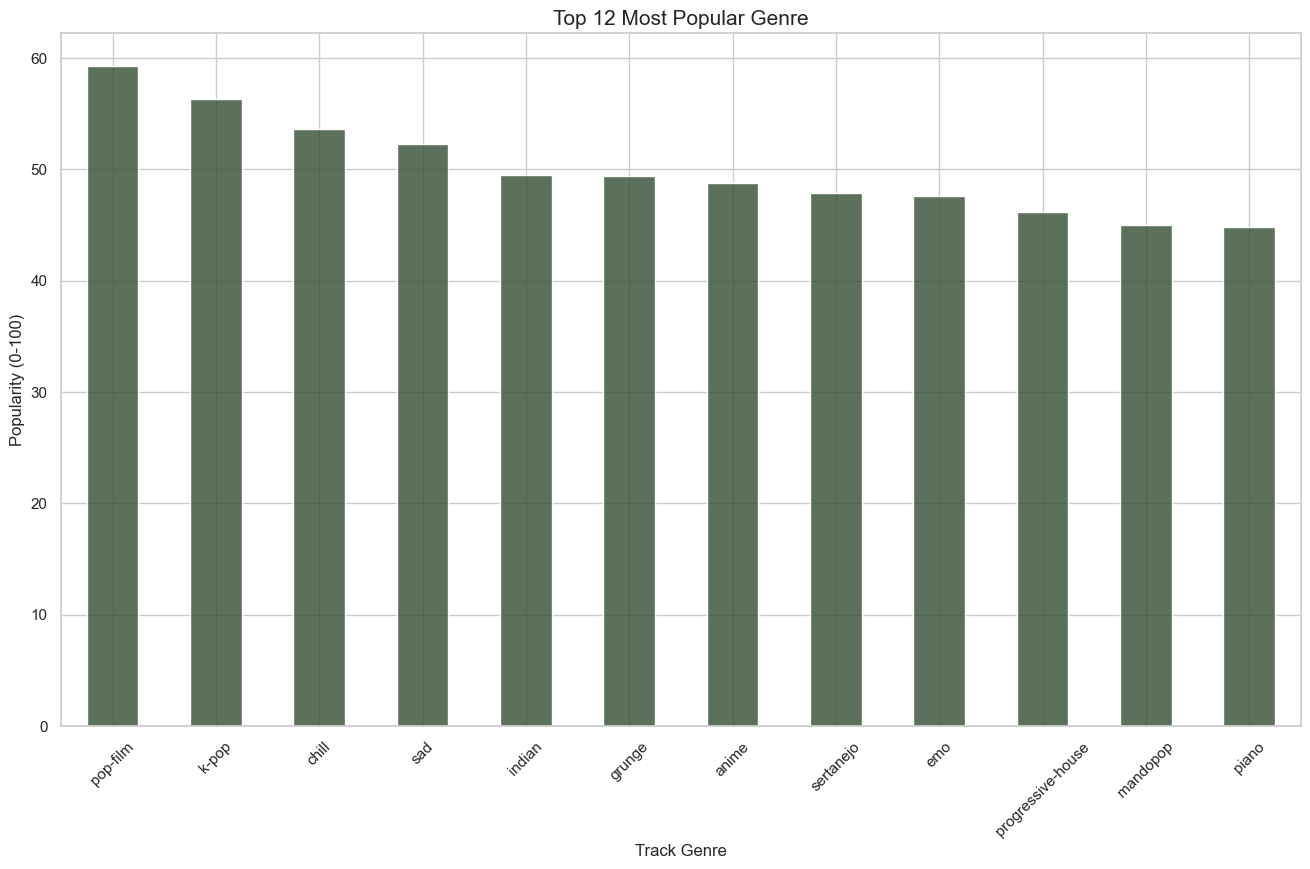

In [334]:
data_score_no_outlier.plot(kind='bar', figsize=(16,9),color=(0.2, 0.3, 0.2, 0.8))
plt.title("Top 12 Most Popular Genre", size = 15)
plt.xticks(rotation=45)
plt.xlabel("Track Genre")
plt.ylabel("Popularity (0-100)")

<b>Check For Duplicate Songs</b>
<ul>
<li>As songs are repeated as the same song appears on an EP and an Album and a "Best Of" We have to remove the unnessecary duplicates and keep the one with the best popularity score</li>
<li> We also need to take careful consideration in cleansing of data here as there could be an artist that has done a cover of the original song so it would have the same name and title <b>A prime example of this would be "Can't Help Falling In Love"</b></li>
</ul>

In [307]:
# Check for duplicates by song name
data[data.duplicated(subset='track_name', keep=False)]

# Display all track names with "Can't Help Falling In Love"
data[data['track_name'].str.contains("Can't Help Falling In Love")]
# data[data['artists'].str.contains("Taylor Swift")]



,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.2660,0.0596,...,-18.515,1,0.0363,0.905,0.000071,0.132,0.1430,181.740,3,acoustic
279,279,24UxG3p1Ghtc5ejJtGBoeL,Kina Grannis,Can't Help Falling In Love (Piano Version),Can't Help Falling In Love - Piano Version,54,211624,False,0.2710,0.0937,...,-15.035,1,0.0367,0.939,0.000000,0.108,0.1470,164.721,5,acoustic
533,533,14UvqLsdqw2dsmVkmTYptE,Kina Grannis,The Living Room Sessions Vol. 3,Can't Help Falling In Love,48,188354,False,0.4440,0.1430,...,-11.449,1,0.0302,0.925,0.000069,0.118,0.1320,100.341,3,acoustic
26503,26503,3vn3IG9kFZ4Kkn0fNwM7PC,Benny Martin;The Wong Janice,Can't Help Falling In Love (Piano & Cello),Can't Help Falling In Love - Piano & Cello,45,190330,False,0.2000,0.1290,...,-18.685,1,0.0370,0.844,0.839000,0.108,0.1330,136.939,4,disney
76057,76057,3R7qNohsO7ucKyQDodJxFc,Andrea Bocelli,Amore (Remastered),Can't Help Falling In Love - Live At Lake Las ...,51,205182,False,0.4610,0.3990,...,-7.894,1,0.0244,0.813,0.013800,0.911,0.1680,97.381,3,opera
76267,76267,3RPUlfBMYL7KCApbHMNE91,Andrea Bocelli;David Foster,Andrea Bocelli Spotify Sessions (Live),Can't Help Falling In Love - Live From Spotify...,53,179869,False,0.2840,0.6010,...,-7.194,1,0.0686,0.926,0.000189,0.527,0.2050,93.221,3,opera
76307,76307,1c5Kt0WUOooNyUILXAXYoR,André Rieu;Johann Strauss Orchestra,Falling In Love,Can't Help Falling In Love,53,229133,False,0.0805,0.2510,...,-15.969,1,0.0372,0.902,0.868000,0.120,0.0525,81.644,3,opera
90101,90101,4hAUynwghvrqDXs1ejKNEq,Elvis Presley,Elvis 30 #1 Hits,Can't Help Falling In Love,65,177840,False,0.4380,0.3250,...,-11.066,1,0.0268,0.893,0.000005,0.107,0.3620,101.577,3,rock-n-roll
92151,92151,4hAUynwghvrqDXs1ejKNEq,Elvis Presley,Elvis 30 #1 Hits,Can't Help Falling In Love,65,177840,False,0.4380,0.3250,...,-11.066,1,0.0268,0.893,0.000005,0.107,0.3620,101.577,3,rockabilly
92776,92776,66t429vEmiqGQoXSrBEGYP,Elvis Presley,Elvis Recorded Live on Stage in Memphis (Legac...,Can't Help Falling In Love - Live at Mid-South...,24,98546,False,0.4480,0.7990,...,-7.572,1,0.0511,0.305,0.000030,0.937,0.6880,51.953,4,rockabilly


In [308]:
# Sort data by 'popularity' descending to ensure highest popularity is kept when deduplicating
data.sort_values('popularity', ascending=False, inplace=True)
# Drop duplicates based on 'track_name' and 'artists' keeping the first entry with the highest popularity
data.drop_duplicates(subset=['track_name', 'artists'], keep='first', inplace=True)
# Check entries to see if there are any duplicates left for a specific track name
data[data['track_name'].str.contains("Can't Help Falling In Love")]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.2660,0.0596,...,-18.515,1,0.0363,0.905,0.000071,0.132,0.1430,181.740,3,acoustic
92151,92151,4hAUynwghvrqDXs1ejKNEq,Elvis Presley,Elvis 30 #1 Hits,Can't Help Falling In Love,65,177840,False,0.4380,0.3250,...,-11.066,1,0.0268,0.893,0.000005,0.107,0.3620,101.577,3,rockabilly
279,279,24UxG3p1Ghtc5ejJtGBoeL,Kina Grannis,Can't Help Falling In Love (Piano Version),Can't Help Falling In Love - Piano Version,54,211624,False,0.2710,0.0937,...,-15.035,1,0.0367,0.939,0.000000,0.108,0.1470,164.721,5,acoustic
76267,76267,3RPUlfBMYL7KCApbHMNE91,Andrea Bocelli;David Foster,Andrea Bocelli Spotify Sessions (Live),Can't Help Falling In Love - Live From Spotify...,53,179869,False,0.2840,0.6010,...,-7.194,1,0.0686,0.926,0.000189,0.527,0.2050,93.221,3,opera
76307,76307,1c5Kt0WUOooNyUILXAXYoR,André Rieu;Johann Strauss Orchestra,Falling In Love,Can't Help Falling In Love,53,229133,False,0.0805,0.2510,...,-15.969,1,0.0372,0.902,0.868000,0.120,0.0525,81.644,3,opera
76057,76057,3R7qNohsO7ucKyQDodJxFc,Andrea Bocelli,Amore (Remastered),Can't Help Falling In Love - Live At Lake Las ...,51,205182,False,0.4610,0.3990,...,-7.894,1,0.0244,0.813,0.013800,0.911,0.1680,97.381,3,opera
26503,26503,3vn3IG9kFZ4Kkn0fNwM7PC,Benny Martin;The Wong Janice,Can't Help Falling In Love (Piano & Cello),Can't Help Falling In Love - Piano & Cello,45,190330,False,0.2000,0.1290,...,-18.685,1,0.0370,0.844,0.839000,0.108,0.1330,136.939,4,disney
92776,92776,66t429vEmiqGQoXSrBEGYP,Elvis Presley,Elvis Recorded Live on Stage in Memphis (Legac...,Can't Help Falling In Love - Live at Mid-South...,24,98546,False,0.4480,0.7990,...,-7.572,1,0.0511,0.305,0.000030,0.937,0.6880,51.953,4,rockabilly


<b> Displaying Of Data after light cleansing</b>

In [309]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.013000,0.000005,0.2660,0.238,131.121,4,dance
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.012500,0.033000,0.2300,0.550,128.033,4,hip-hop
89411,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.583000,0.000002,0.2180,0.850,124.980,4,reggaeton
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.003830,0.000007,0.3710,0.304,128.040,4,pop
68304,68304,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,...,-5.198,0,0.2530,0.099300,0.000291,0.1260,0.187,106.672,4,latino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,53498,0bgCV5x6FxiaDC9PRLY0xV,Jess Glynne,Happy Commute,Rollin,0,218040,True,0.716,0.752,...,-3.504,0,0.0533,0.000804,0.000000,0.0757,0.708,117.025,4,house
53537,53537,0ZvFYGbUkGXHThmN6Gnerr,Kungs;JHart,pov: it's 2020,Dopamine,0,179481,False,0.574,0.718,...,-7.644,0,0.0337,0.309000,0.000002,0.1090,0.316,125.974,3,house
53539,53539,0fWKEeunafFWPc6P3N53Ec,Elderbrook;Rudimental,Good Enough - Easy Pop,Something About You,0,203200,False,0.767,0.605,...,-5.736,0,0.1870,0.559000,0.000363,0.1930,0.657,107.041,4,house
53588,53588,4WCpgL2vHyx2vusJ5mbBnF,Nathan Dawe;Jaykae;Malika,10's Dance Classics,Flowers,0,197209,False,0.671,0.925,...,-4.518,0,0.0783,0.015200,0.000000,0.2890,0.449,126.109,4,house


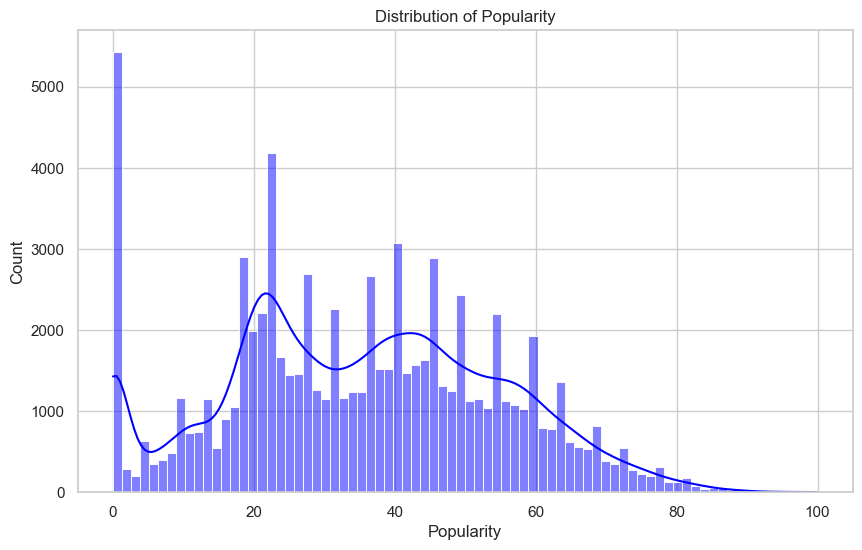

In [310]:
# distribution of the popularity of the tracks
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], color='blue', kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

<b> We can now see that the distribution of popularity now is more closely representing standard deviation, meaning the data is distributed more evenly and fairly</b>
</br>
In comparison to the initial distribution we can see that a lot of the errors were fixed with the missing data and the null values of the data for popularity

<h1> Filter Songs/Rows by top 5 Genres</h1>

In [311]:
# Drop data so its only pop and rock and accoustic and dance
data = data[data['track_genre'].isin(['pop', 'rock', 'acoustic', 'dance'])]
data

# top_genre = data['track_genre'].value_counts().head(1).index
# data = data[data['track_genre'].isin(top_genre)]
# data 


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.2380,131.121,4,dance
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.3040,128.040,4,pop
81174,81174,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,...,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.8250,139.994,4,pop
20000,20000,5IgjP7X4th6nMNDh4akUHb,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,...,-5.529,0,0.0427,0.06350,0.000001,0.1050,0.3100,116.992,4,dance
81052,81052,4LRPiXqCikLlN15c3yImP7,Harry Styles,As It Was,As It Was,95,167303,False,0.520,0.731,...,-5.338,0,0.0557,0.34200,0.001010,0.3110,0.6620,173.930,4,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81744,81744,1qJ4p0TK46dVxY4nEHDGTb,Bruno Mars;R3HAB,Today's Party Hits,24K Magic - R3hab Remix,0,158678,False,0.764,0.708,...,-5.692,0,0.2100,0.14600,0.000000,0.3300,0.5660,106.175,4,pop
81749,81749,4Rt5ie6v0adFZmbTPoo3qZ,Coldplay;Geoff Swan;Hardwell;Mark 'Spike' Stent,10's Dance Classics,A Sky Full of Stars - Hardwell Remix,0,313124,False,0.652,0.657,...,-4.491,0,0.0306,0.00208,0.000069,0.0859,0.0861,127.997,4,pop
81794,81794,0Cr69H8rDTrwIkJV27sUYj,Coldplay,20's Rock,Higher Power,0,211294,False,0.507,0.828,...,-6.023,1,0.0449,0.00711,0.000024,0.2610,0.4890,178.032,4,pop
81797,81797,6fBMKVPDNNdnKzaW4Hvu2M,Coldplay,Coffee Moment,Everyday Life,0,258532,False,0.512,0.452,...,-8.991,1,0.0292,0.77500,0.081800,0.0650,0.2350,124.103,4,pop


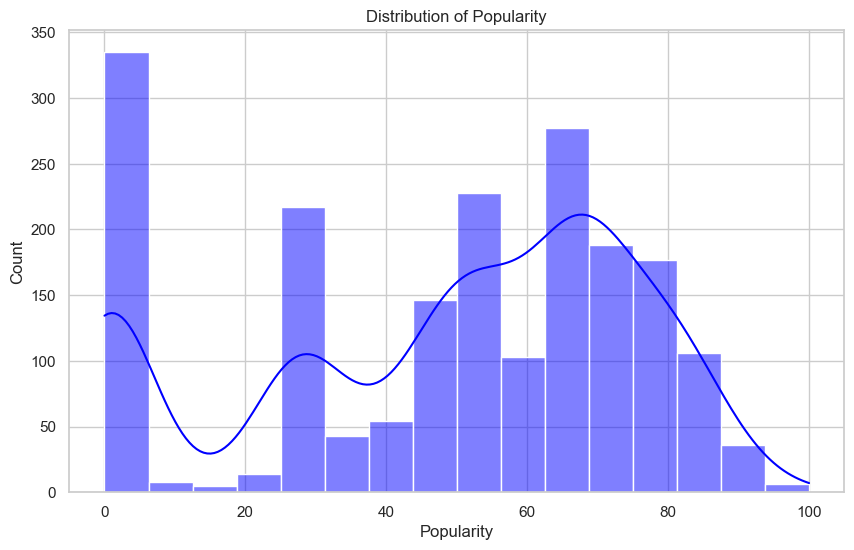

In [312]:
# distribution of the popularity of the tracks
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], color='blue', kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

In [313]:
data.to_csv('cleaned_dataset.csv', index=False)

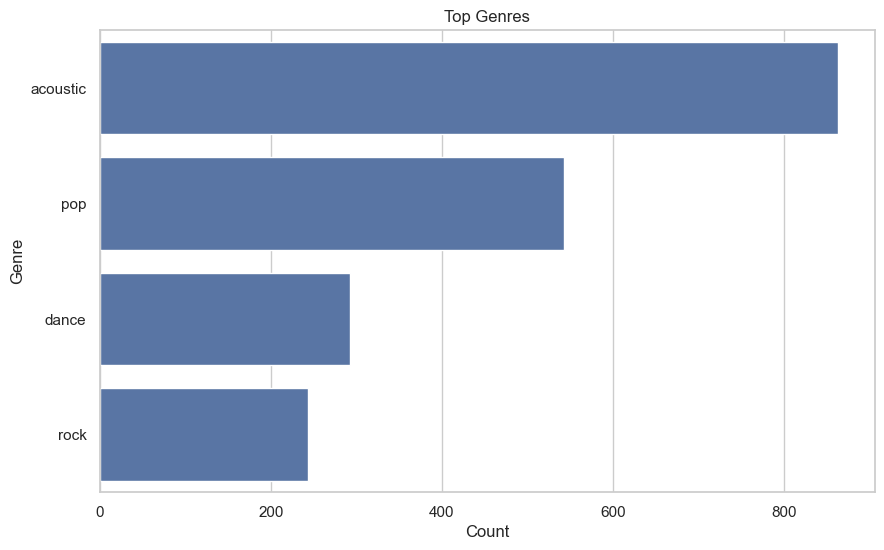

In [314]:
# Display Top Genres variables
plt.figure(figsize=(10, 6))
sns.countplot(y='track_genre', data=data, order = data['track_genre'].value_counts().index)
plt.title('Top Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [315]:
# Filter data to only include top 50 artists
top_artists = data['artists'].value_counts().head(50).index
data = data[data['artists'].isin(top_artists)]
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
81174,81174,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,...,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,4,pop
81000,81000,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,After Hours,Blinding Lights,91,200040,False,0.514,0.730,...,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,pop
81150,81150,09mEdoA6zrmBPgTEN5qXmN,The Weeknd,"My Dear Melancholy,",Call Out My Name,89,228373,False,0.461,0.593,...,-4.954,1,0.0356,0.17000,0.000000,0.3070,0.175,134.170,3,pop
91012,91012,0HqZX76SFLDz2aW8aiqi7G,Imagine Dragons,Bones,Bones,89,165264,False,0.773,0.742,...,-3.678,0,0.0460,0.02060,0.000000,0.0754,0.571,114.071,4,rock
81200,81200,5QO79kh1waicV47BqGRL3g,The Weeknd,After Hours,Save Your Tears,89,215626,True,0.680,0.826,...,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20789,20789,4In9tfYkdjm3Qro0XhjI0u,Jason Derulo,New Pop Icons,Pull-Up,0,186973,True,0.643,0.759,...,-4.693,1,0.1560,0.00258,0.000003,0.0612,0.460,191.959,4,dance
20787,20787,6vYmcV1rKAs5YTcdBFOrtM,Jason Derulo,New RnB,F It Up,0,157078,True,0.847,0.853,...,-4.724,0,0.1230,0.11000,0.000000,0.1400,0.811,100.006,4,dance
20795,20795,5itzMvVywRJScC9DUyHpzZ,Jason Derulo,Good Enough - Easy Pop,It Girl,0,192200,False,0.667,0.718,...,-4.736,0,0.0605,0.01650,0.000000,0.1040,0.345,91.993,4,dance
81842,81842,67l8nACchnc7Mq9LP6XqNz,Sam Smith,Weihnachtspop 2022,"River - Recorded At RAK Studios, London",0,208573,False,0.450,0.181,...,-11.417,1,0.0406,0.89600,0.000001,0.1100,0.196,115.443,4,pop


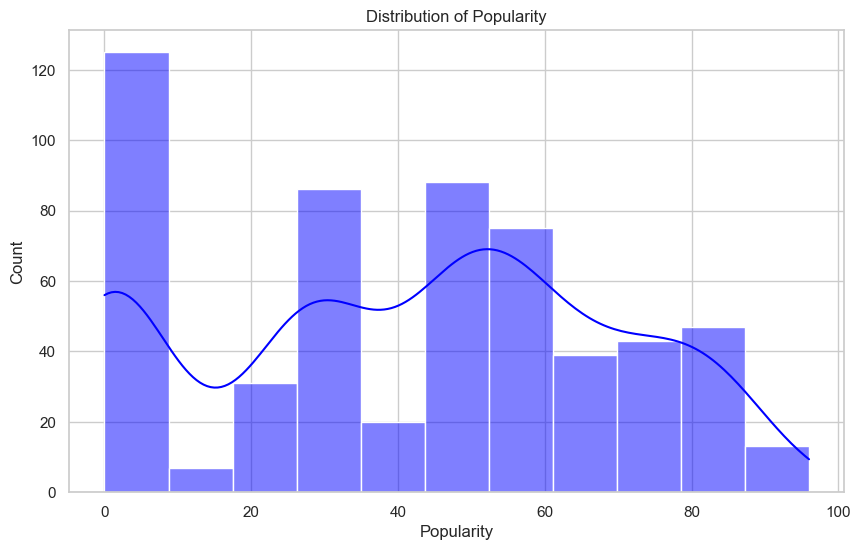

In [316]:
# distribution of the popularity of the tracks
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], color='blue', kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

In [317]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
81174,81174,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,...,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,4,pop
81000,81000,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,After Hours,Blinding Lights,91,200040,False,0.514,0.730,...,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,pop
81150,81150,09mEdoA6zrmBPgTEN5qXmN,The Weeknd,"My Dear Melancholy,",Call Out My Name,89,228373,False,0.461,0.593,...,-4.954,1,0.0356,0.17000,0.000000,0.3070,0.175,134.170,3,pop
91012,91012,0HqZX76SFLDz2aW8aiqi7G,Imagine Dragons,Bones,Bones,89,165264,False,0.773,0.742,...,-3.678,0,0.0460,0.02060,0.000000,0.0754,0.571,114.071,4,rock
81200,81200,5QO79kh1waicV47BqGRL3g,The Weeknd,After Hours,Save Your Tears,89,215626,True,0.680,0.826,...,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20789,20789,4In9tfYkdjm3Qro0XhjI0u,Jason Derulo,New Pop Icons,Pull-Up,0,186973,True,0.643,0.759,...,-4.693,1,0.1560,0.00258,0.000003,0.0612,0.460,191.959,4,dance
20787,20787,6vYmcV1rKAs5YTcdBFOrtM,Jason Derulo,New RnB,F It Up,0,157078,True,0.847,0.853,...,-4.724,0,0.1230,0.11000,0.000000,0.1400,0.811,100.006,4,dance
20795,20795,5itzMvVywRJScC9DUyHpzZ,Jason Derulo,Good Enough - Easy Pop,It Girl,0,192200,False,0.667,0.718,...,-4.736,0,0.0605,0.01650,0.000000,0.1040,0.345,91.993,4,dance
81842,81842,67l8nACchnc7Mq9LP6XqNz,Sam Smith,Weihnachtspop 2022,"River - Recorded At RAK Studios, London",0,208573,False,0.450,0.181,...,-11.417,1,0.0406,0.89600,0.000001,0.1100,0.196,115.443,4,pop


In [318]:
# Turning duration_ms to minutes
data['duration_min'] = data['duration_ms'] / 60000
data.drop('duration_ms', axis=1, inplace=True)
data

C:\Users\kylem\AppData\Local\Temp\ipykernel_19276\2509459038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_min'] = data['duration_ms'] / 60000
C:\Users\kylem\AppData\Local\Temp\ipykernel_19276\2509459038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('duration_ms', axis=1, inplace=True)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
81174,81174,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,False,0.704,0.797,0,...,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,4,pop,2.474750
81000,81000,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,After Hours,Blinding Lights,91,False,0.514,0.730,1,...,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,pop,3.334000
81150,81150,09mEdoA6zrmBPgTEN5qXmN,The Weeknd,"My Dear Melancholy,",Call Out My Name,89,False,0.461,0.593,1,...,1,0.0356,0.17000,0.000000,0.3070,0.175,134.170,3,pop,3.806217
91012,91012,0HqZX76SFLDz2aW8aiqi7G,Imagine Dragons,Bones,Bones,89,False,0.773,0.742,5,...,0,0.0460,0.02060,0.000000,0.0754,0.571,114.071,4,rock,2.754400
81200,81200,5QO79kh1waicV47BqGRL3g,The Weeknd,After Hours,Save Your Tears,89,True,0.680,0.826,0,...,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,pop,3.593767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20789,20789,4In9tfYkdjm3Qro0XhjI0u,Jason Derulo,New Pop Icons,Pull-Up,0,True,0.643,0.759,1,...,1,0.1560,0.00258,0.000003,0.0612,0.460,191.959,4,dance,3.116217
20787,20787,6vYmcV1rKAs5YTcdBFOrtM,Jason Derulo,New RnB,F It Up,0,True,0.847,0.853,11,...,0,0.1230,0.11000,0.000000,0.1400,0.811,100.006,4,dance,2.617967
20795,20795,5itzMvVywRJScC9DUyHpzZ,Jason Derulo,Good Enough - Easy Pop,It Girl,0,False,0.667,0.718,1,...,0,0.0605,0.01650,0.000000,0.1040,0.345,91.993,4,dance,3.203333
81842,81842,67l8nACchnc7Mq9LP6XqNz,Sam Smith,Weihnachtspop 2022,"River - Recorded At RAK Studios, London",0,False,0.450,0.181,10,...,1,0.0406,0.89600,0.000001,0.1100,0.196,115.443,4,pop,3.476217


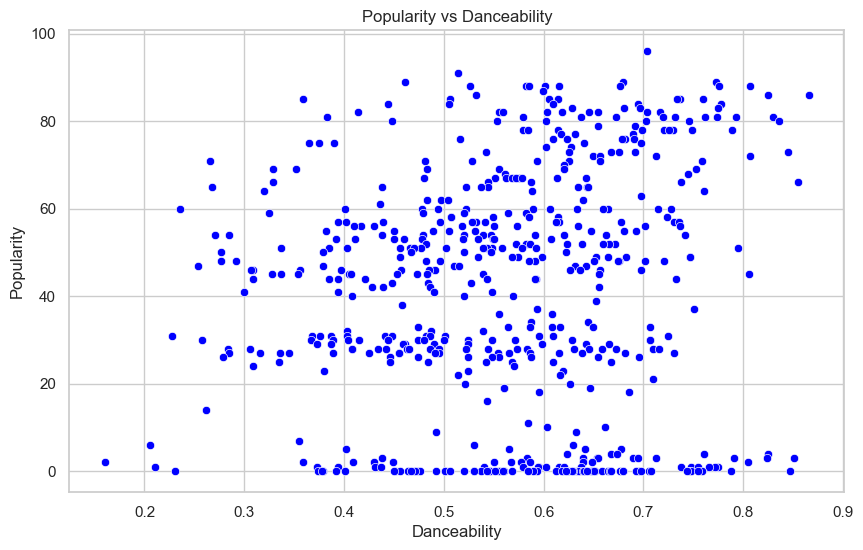

In [319]:
# Scatter plot of popularity vs danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='popularity', data=data, color='blue')
plt.title('Popularity vs Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()


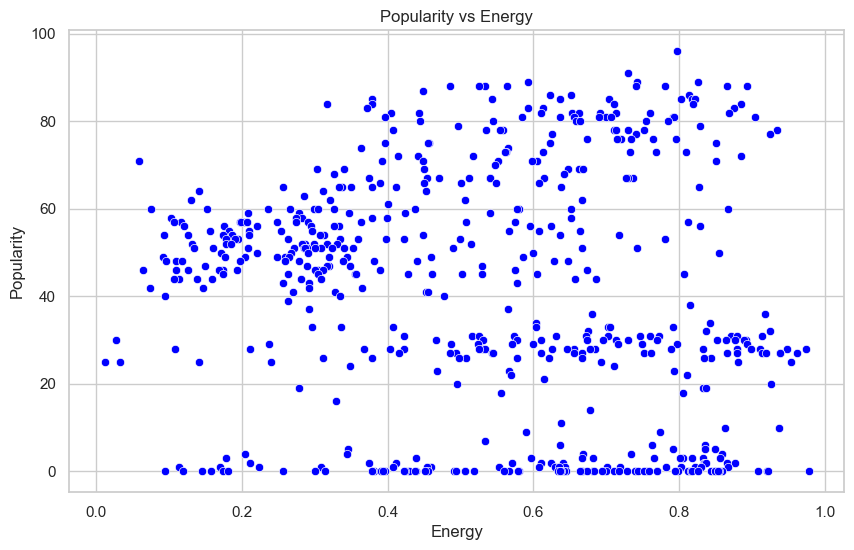

In [320]:
# Scatter plot of popularity vs energy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='popularity', data=data, color='blue')
plt.title('Popularity vs Energy')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

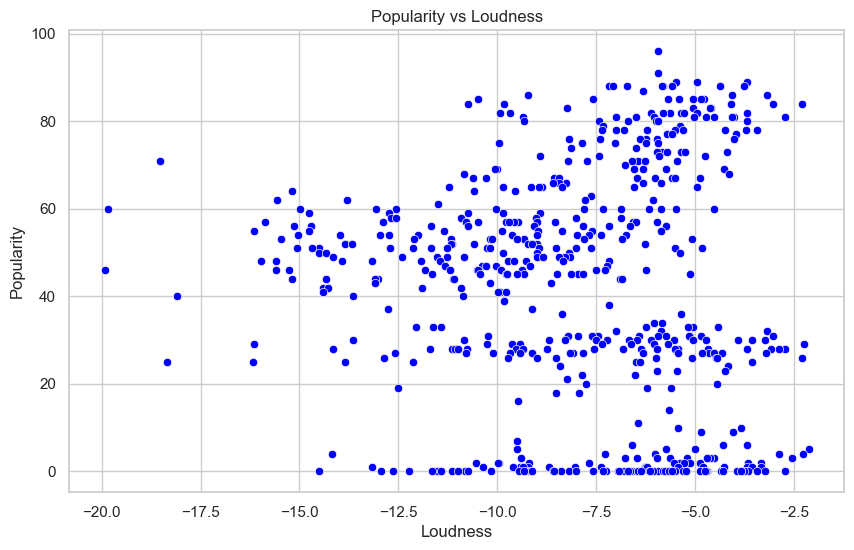

In [321]:
# Scatter plot of popularity vs loudness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='popularity', data=data, color='blue')
plt.title('Popularity vs Loudness')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.show()

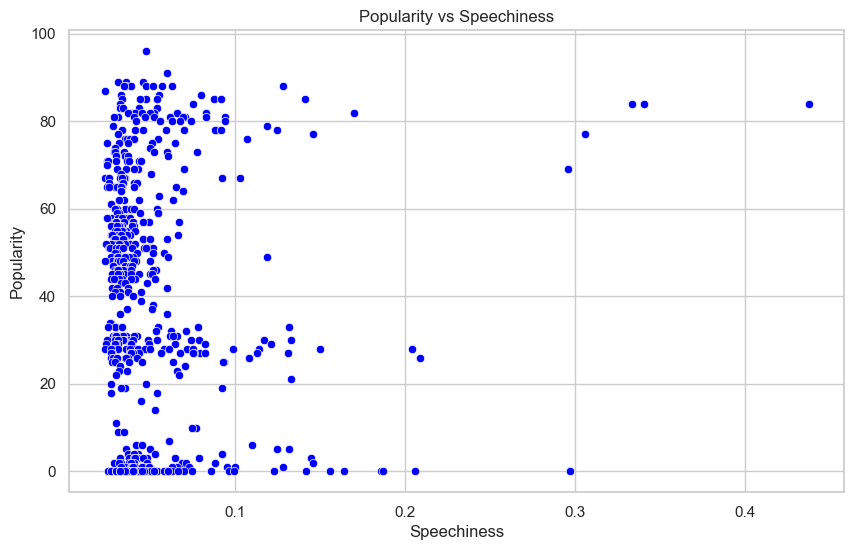

In [322]:
# Scatter plot of popularity vs speechiness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='speechiness', y='popularity', data=data, color='blue')
plt.title('Popularity vs Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
plt.show()

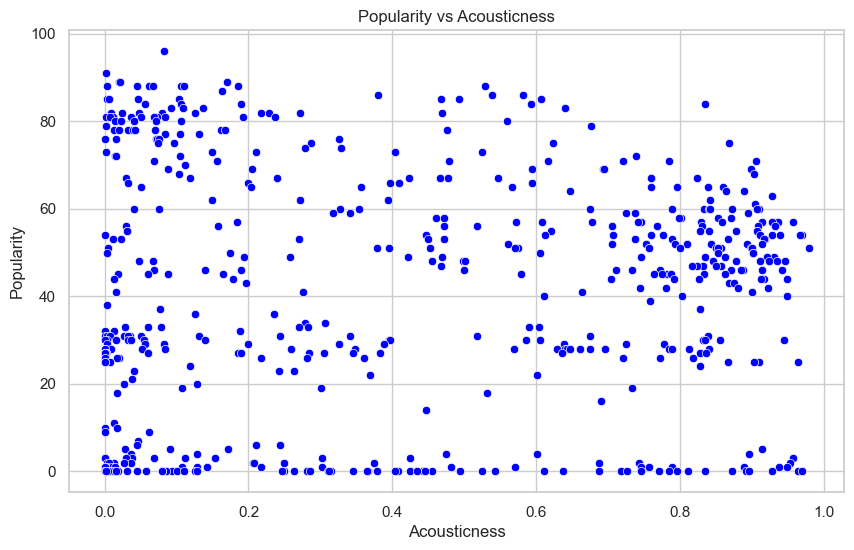

In [323]:
# Scatter plot of popularity vs acousticness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='acousticness', y='popularity', data=data, color='blue')
plt.title('Popularity vs Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.show()


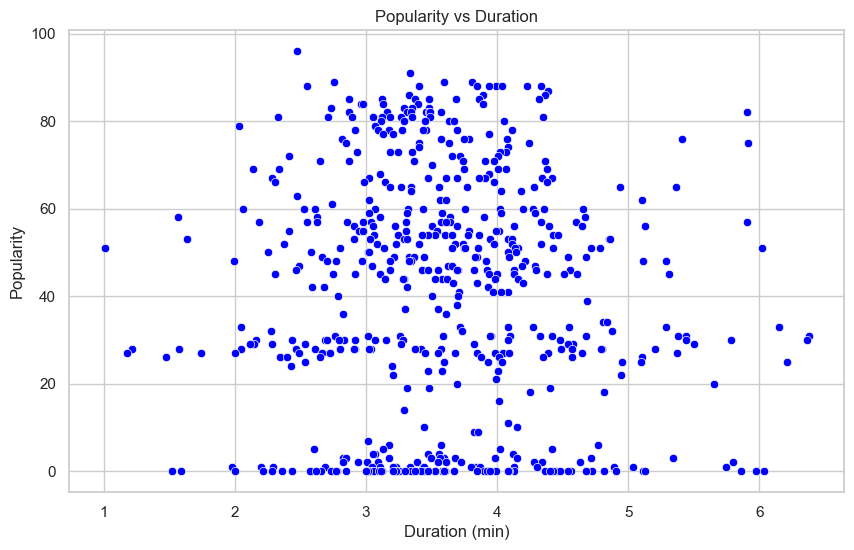

In [324]:
# popularity vs duration_min with increments of 1 in duration_min on x-axis

plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_min', y='popularity', data=data, color='blue')
plt.title('Popularity vs Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Popularity')
plt.show()



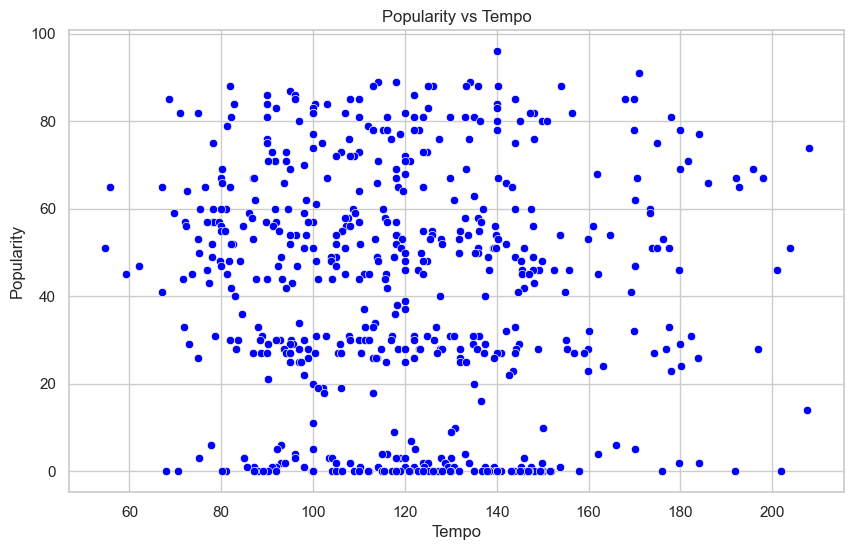

In [325]:
# popularity vs tempo with increments of 1 in tempo on x-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='popularity', data=data, color='blue')
plt.title('Popularity vs Tempo')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.show()

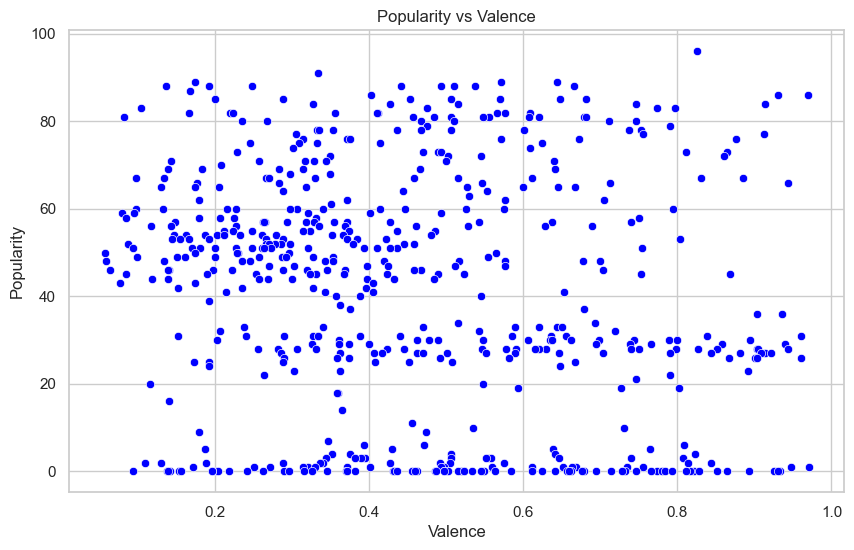

In [326]:
# popularity vs valence with increments of 1 in valence on x-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='popularity', data=data, color='blue')
plt.title('Popularity vs Valence')
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.show()


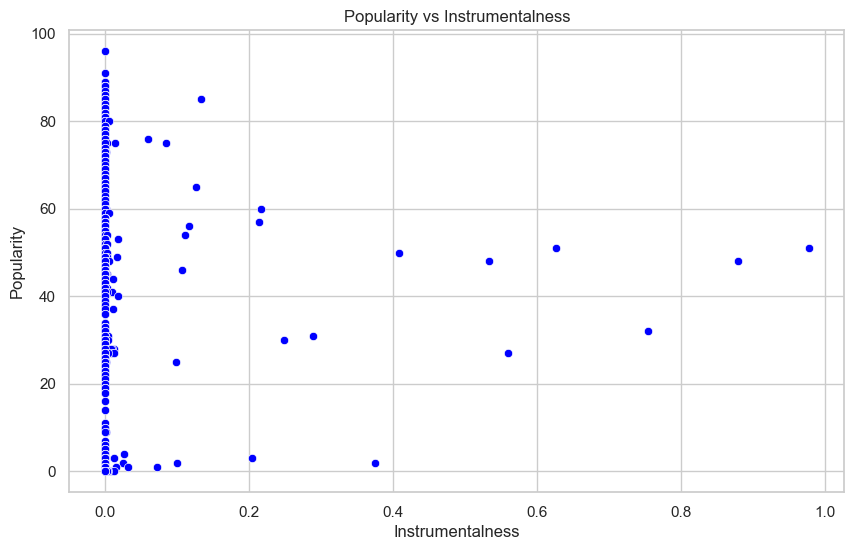

In [327]:
# popularity vs instrumentalness with increments of 1 in instrumentalness on x-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='instrumentalness', y='popularity', data=data, color='blue')
plt.title('Popularity vs Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.show()


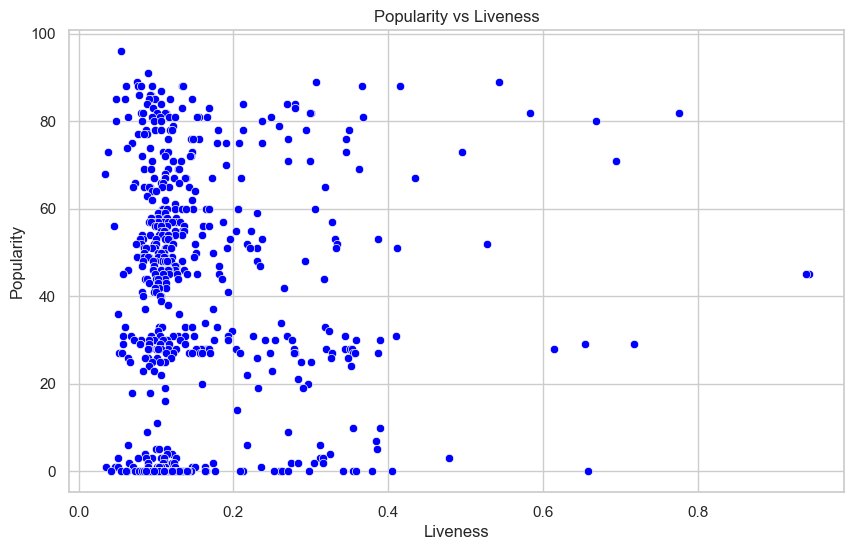

In [328]:
# popularity vs liveness with increments of 1 in liveness on x-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='liveness', y='popularity', data=data, color='blue')
plt.title('Popularity vs Liveness')
plt.xlabel('Liveness')
plt.ylabel('Popularity')
plt.show()


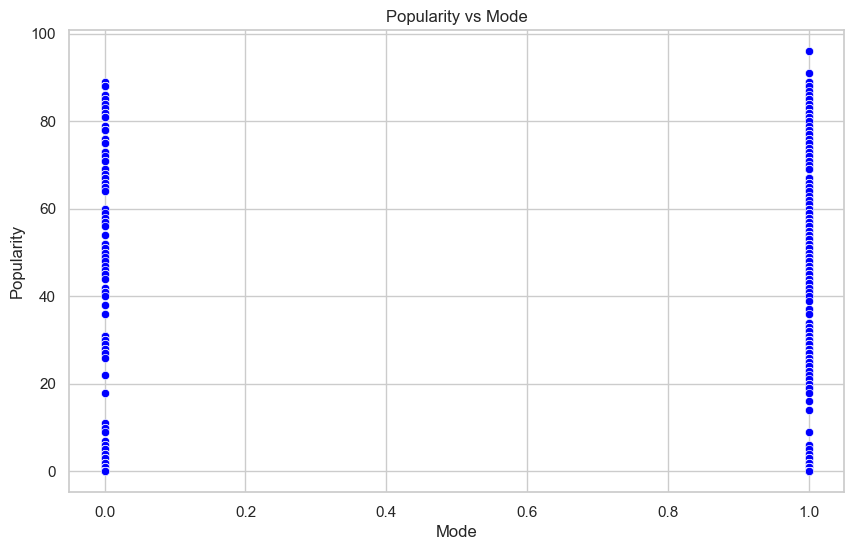

In [329]:
# popularity vs mode with increments of 1 in mode on x-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mode', y='popularity', data=data, color='blue')
plt.title('Popularity vs Mode')
plt.xlabel('Mode')
plt.ylabel('Popularity')
plt.show()


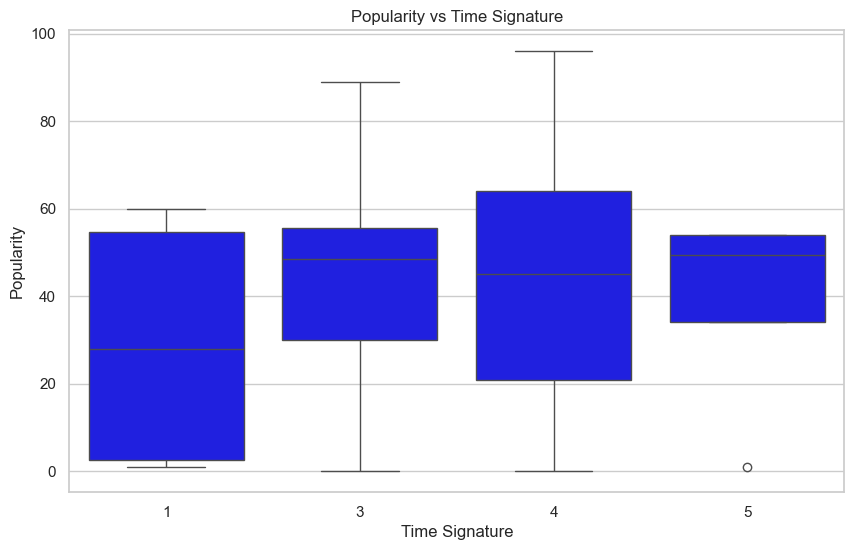

In [330]:
# popularity vs time_signature boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_signature', y='popularity', data=data, color='blue')
plt.title('Popularity vs Time Signature')
plt.xlabel('Time Signature')
plt.ylabel('Popularity')
plt.show()


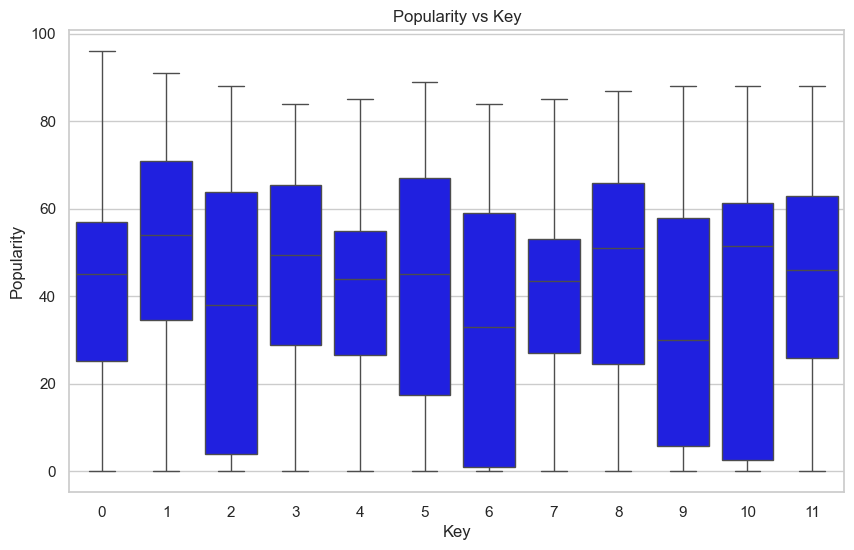

In [331]:
# popularity vs key boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='key', y='popularity', data=data, color='blue')
plt.title('Popularity vs Key')
plt.xlabel('Key')
plt.ylabel('Popularity')
plt.show()

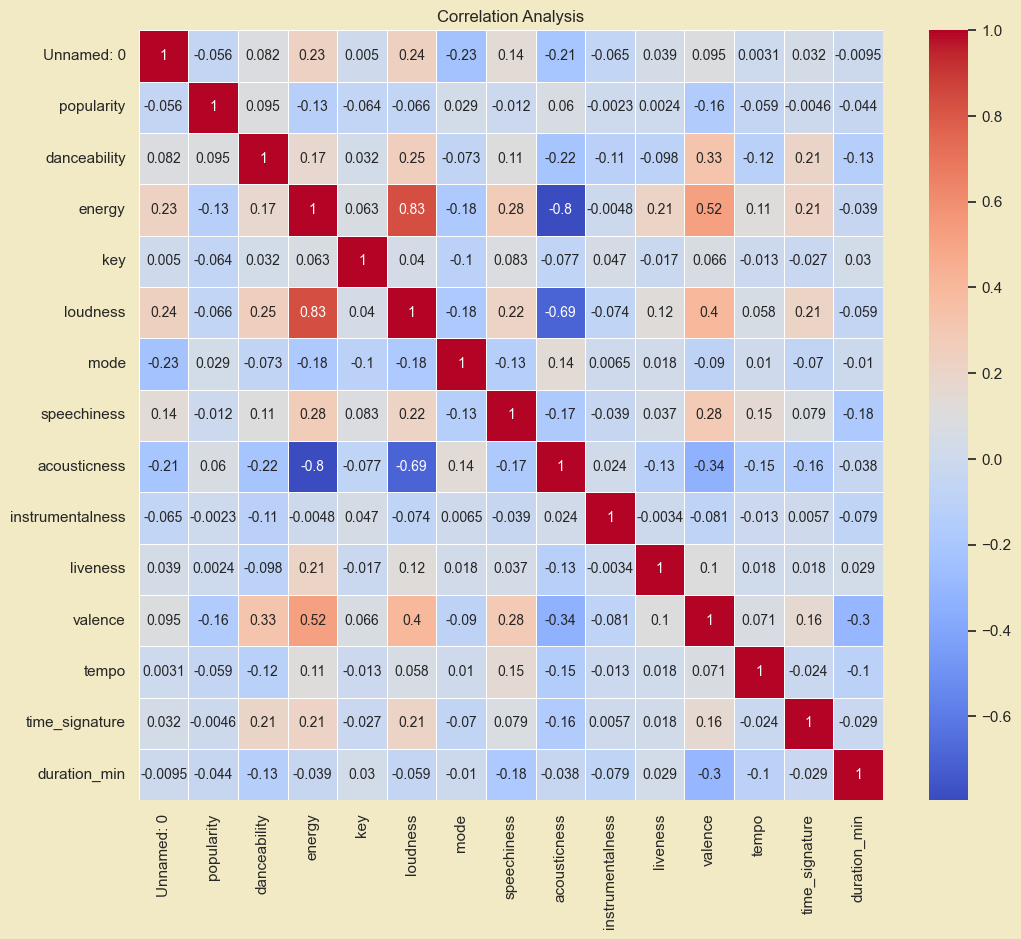

In [332]:
# Correlation matrix



# Including numerical colmumns
corr_mat = data.select_dtypes(include=["int", "float"]).corr()

# Adjusting figure visuals
plt.figure(figsize=(12, 10), facecolor='#F2EAC5', edgecolor='black')
ax = plt.axes()
ax.set_facecolor('#F2EAC5')
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Analysis')
plt.show()
